# Principal Component Analysis (PCA)

This notebook provides the code for the Part 2 of the Exploratory Data Analysis course.  Please review in conjunction with the course notes.

## Carry out a PCA

### Import libraries
Import the libraries we need.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np

# Import functions created for this course
from functions import *

### Loading and cleaning data
Load the data from the csv file:

In [2]:
# Load the data from the csv file into a Pandas Dataframe
original_data = pd.read_csv('world_university_rankings_2016.csv', index_col='university_name')
original_data.head()

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,,,,
California Institute of Technology,1,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33.0,67.0
University of Oxford,2,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46.0,54.0
Stanford University,3,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,4,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,5,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37.0,63.0


Filter our data down to just the remaining columns of interest:

In [3]:
X = original_data[['teaching', 'international', 'research', 
       'citations', 'income', 'num_students', 'student_staff_ratio', 
       'international%', 'female%','male%']]
X.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,
California Institute of Technology,95.6,64.0,97.6,99.8,97.8,2243.0,6.9,27.0,33.0,67.0
University of Oxford,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34.0,46.0,54.0
Stanford University,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,88.2,91.5,96.7,97.0,55.0,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,89.4,84.0,88.6,99.7,95.4,11074.0,9.0,33.0,37.0,63.0


See if our data contains nulls:

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, California Institute of Technology to Yuan Ze University
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             800 non-null    float64
 1   international        800 non-null    float64
 2   research             800 non-null    float64
 3   citations            800 non-null    float64
 4   income               763 non-null    float64
 5   num_students         793 non-null    float64
 6   student_staff_ratio  793 non-null    float64
 7   international%       790 non-null    float64
 8   female%              736 non-null    float64
 9   male%                736 non-null    float64
dtypes: float64(10)
memory usage: 68.8+ KB


Replace nulls with the mean value for the variable.

In [5]:
X = X.fillna(X.mean()) 

### Standardising the data
Check the range of values for the variables we have.

In [6]:
X.describe()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
count,800.0000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,31.5840,48.500375,28.128625,51.30975,46.869594,24161.264817,19.116393,12.702532,49.538043,50.461957
std,14.9854,23.690816,19.532270,27.04544,20.094099,22470.143414,12.467030,10.609056,11.473152,11.473152
min,9.9000,7.100000,2.900000,1.20000,28.000000,462.000000,0.600000,0.000000,1.000000,0.000000
25%,21.0000,29.450000,14.350000,27.52500,31.800000,12344.000000,12.300000,5.000000,46.000000,44.000000
50%,27.0000,45.700000,22.100000,50.30000,39.900000,20307.000000,16.850000,10.000000,51.000000,49.000000
75%,37.5000,65.450000,35.525000,74.90000,53.700000,29640.500000,22.225000,18.000000,56.000000,54.000000
max,95.6000,99.900000,99.000000,100.00000,100.000000,379231.000000,162.600000,82.000000,100.000000,99.000000


Apply the standard scaler:

In [7]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 4.27456366,  0.65465542,  3.55897378, ...,  1.34850955,
        -1.44235777,  1.44235777],
       [ 3.66692605,  1.93865583,  3.62557194, ...,  2.008736  ,
        -0.30856882,  0.30856882],
       [ 4.06756624,  1.17416874,  3.48725268, ...,  0.87691922,
        -0.65742695,  0.65742695],
       ...,
       [-0.50640919, -1.36848995, -0.91847191, ..., -0.91512401,
         0.        ,  0.        ],
       [-0.76682531, -1.0643846 , -0.62134164, ..., -0.44353369,
        -1.87843044,  1.87843044],
       [-1.02724143, -1.30091099, -0.50351413, ..., -0.82080595,
        -0.57021242,  0.57021242]])

Plot the data before scaling:

<AxesSubplot:ylabel='Density'>

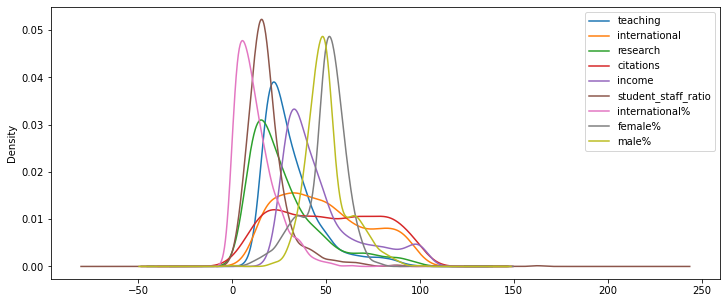

In [8]:
X1 = pd.DataFrame(X,columns=X.columns)
X1.drop('num_students', axis=1,inplace=True)
X1.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

In [9]:
X1

,teaching,international,research,citations,income,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,
California Institute of Technology,95.6,64.0,97.6,99.8,97.8,6.9,27.0,33.000000,67.000000
University of Oxford,86.5,94.4,98.9,98.8,73.1,11.6,34.0,46.000000,54.000000
Stanford University,92.5,76.3,96.2,99.9,63.3,7.8,22.0,42.000000,58.000000
University of Cambridge,88.2,91.5,96.7,97.0,55.0,11.8,34.0,46.000000,54.000000
Massachusetts Institute of Technology,89.4,84.0,88.6,99.7,95.4,9.0,33.0,37.000000,63.000000
...,...,...,...,...,...,...,...,...,...
Yeungnam University,18.6,24.3,10.9,26.5,35.4,15.3,3.0,48.000000,52.000000
Yıldız Technical University,14.5,14.9,7.6,19.3,44.0,28.7,2.0,36.000000,64.000000
Yokohama City University,24.0,16.1,10.2,36.4,37.9,3.7,3.0,49.538043,50.461957


The distribution for max_students is on such a different scale that we need to plot it separately:

<AxesSubplot:ylabel='Density'>

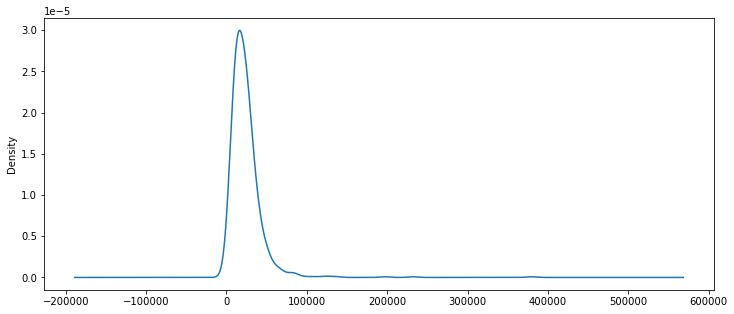

In [10]:
X2 = pd.DataFrame(X,columns=X.columns)['num_students']
X2.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

Plot the data after standarisation:

<AxesSubplot:ylabel='Density'>

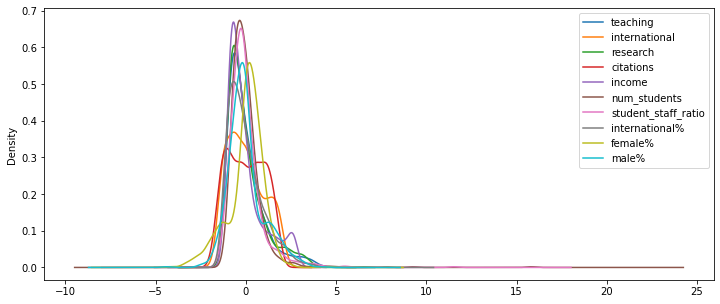

In [11]:
pd.DataFrame(X_scaled,columns=X.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

### Perform PCA
Perform a PCA on our standardised data:

In [12]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 10

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled)

PCA(n_components=10)

## Analyse the results

### Explained Variance Ratio
Array of the variance of the data explained by each of the 10 principal components, starting with PC1, the principal component that explains most of the variance.

In [13]:
pca.explained_variance_ratio_

array([3.21371891e-01, 2.37089839e-01, 1.55600315e-01, 1.05351043e-01,
       6.92858779e-02, 5.47049848e-02, 3.52056608e-02, 1.45935070e-02,
       6.79688170e-03, 4.04436782e-33])

Express the explained variance ratio as a cumulative sum:

In [14]:
pca.explained_variance_ratio_.cumsum()

array([0.32137189, 0.55846173, 0.71406204, 0.81941309, 0.88869897,
       0.94340395, 0.97860961, 0.99320312, 1.        , 1.        ])

### Scree Plot
The explained variance ratio in a **scree plot**.

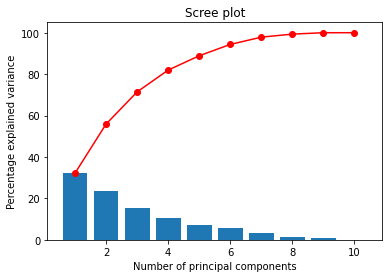

In [15]:
display_scree_plot(pca) 

### Component Scores
Get the components from the pca object:

In [16]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
# etc

Remind ourselves of what columns we have in the data:

In [17]:
X.columns

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international%', 'female%',
       'male%'],
      dtype='object')

Look at the components:

In [18]:
pc1

array([ 0.44602246,  0.41763286,  0.47918623,  0.4372045 ,  0.17746079,
       -0.06111775, -0.0565289 ,  0.39562507,  0.07394972, -0.07394972])

Do the same for PC2:

In [19]:
pc2 = pca.components_[1]
pc2

array([-0.17388542,  0.17493695, -0.14625   ,  0.0530956 , -0.28297188,
        0.2070367 ,  0.21899687,  0.09335706,  0.60635809, -0.60635809])

### Correlation Circle

Plot these component scores on a correlation circle - PC1 against PC2:

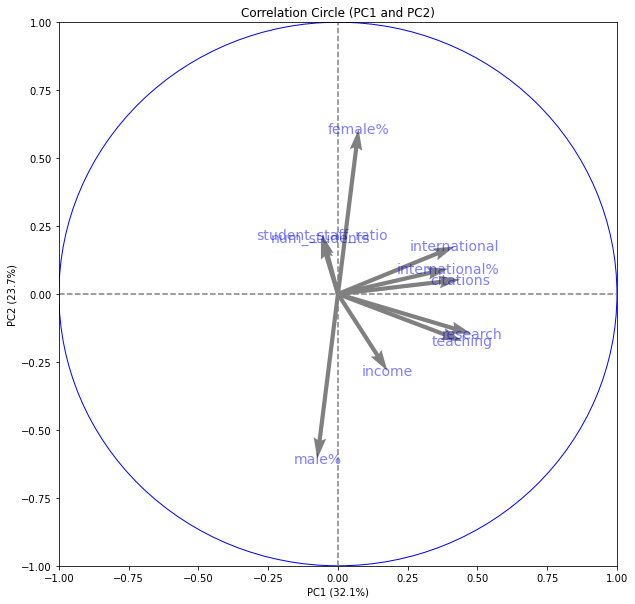

In [20]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(X.columns),) 

PC2 against PC3:

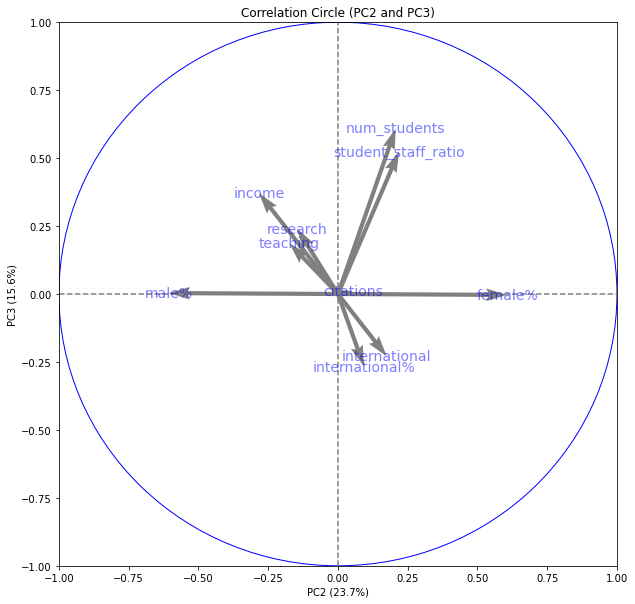

In [21]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(1,2)], labels = np.array(X.columns),) 

### Individuals Factor Map
Plot our samples on a scatter plot in the new factorial planes. 

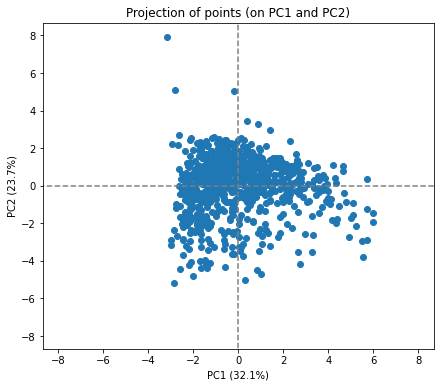

In [22]:
# Transform the original scaled data to the new vector space
X_projected = pca.transform(X_scaled) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, num_components, pca, [(0,1)])
plt.show()

Band the data into the top 10, top 100 and top 1000 universities:

In [29]:
# Take a copy of the data an add a new column for the banding
classed_data = original_data.copy()
append_class(classed_data, 'rank_band','world_rank',[0,11,101,1000],['10','100','1000'])

# Get a list of the new bandings that we can pass to the plot
classed_data = classed_data.reset_index()
rank_band = [classed_data.loc[uni_id, "rank_band"] for uni_id in range(0,len(X_scaled))]

Plot the samples again, this time showing the bands as separate colours:

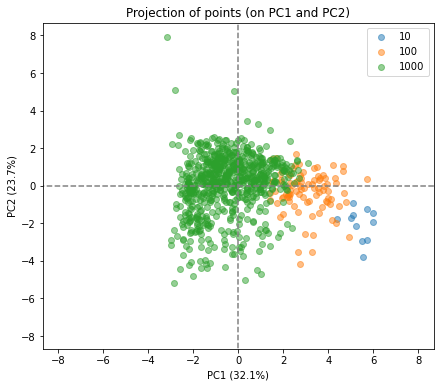

In [24]:
# Transform the original scaled data to the new vector space and display data points
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, num_components, pca, [(0,1)], illustrative_var = rank_band, alpha = 0.5)

Factor maps for other factorial planes:

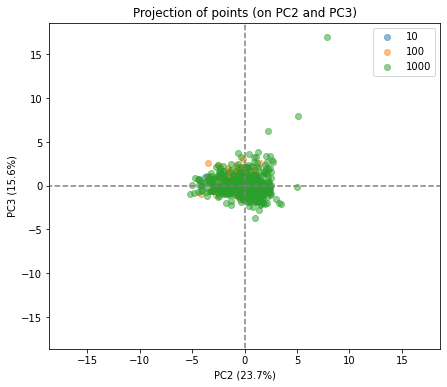

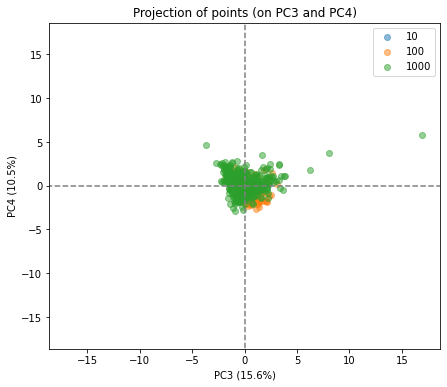

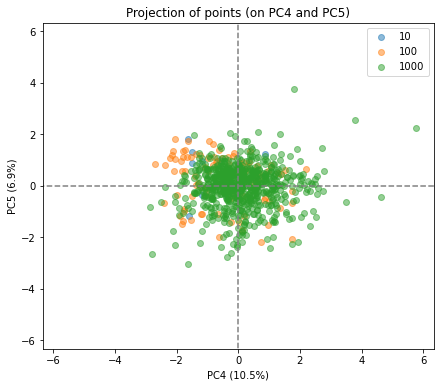

In [25]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, num_components, pca, [(1,2),(2,3),(3,4)], illustrative_var = rank_band, alpha = 0.5)